# WeatherPy
## Analysis
* The closer you get to the equator the warmer it gets regardless of Earth's tilt. Earth's tilt will change the weather for either [> 0 degrees latitude >] positions on Earth, effectively creating seasons. 
* The equator seems to have less wind speed than other locations on Earth but the difference is minimal.
* Cloudiness and humidity ranges in cities aren't affected by their proximity to the earth's equator. I would assume that those values are affected by their closeness to bodies of water, this is only a hypothesis and needs to be explored further.

In [1]:
# Dependencies
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openweathermapy.core as ow
from datetime import datetime
from citipy import citipy
from progressbar import ProgressBar

In [2]:
# latitude range is (-90,90) longitude range is (-180,180)
lat_coord = np.random.uniform(-90,91,700)
lng_coord = np.random.uniform(-180,181,700)

## Generate Cities Dataframe

In [3]:
weather_df = pd.DataFrame()
weather_df['city_name'] = ''
weather_df['country_code'] = ''
weather_df['latitude'] = ''
weather_df['longitude'] = ''

bar = ProgressBar()
for i in bar(range(len(lat_coord))):
    weather_df.set_value(i,'city_name',citipy.nearest_city(lat_coord[i], lng_coord[i]).city_name)
    weather_df.set_value(i,'country_code',citipy.nearest_city(lat_coord[i], lng_coord[i]).country_code)
    weather_df.set_value(i,'latitude',round(lat_coord[i],4))
    weather_df.set_value(i,'longitude',round(lng_coord[i],4))

100% (700 of 700) |#######################| Elapsed Time: 0:00:01 Time: 0:00:01


In [4]:
weather_df.head()

,city_name,country_code,latitude,longitude
0,hithadhoo,mv,-16.399,85.6147
1,cape town,za,-55.2946,5.1489
2,tuatapere,nz,-57.3422,157.991
3,talnakh,ru,75.5434,92.4531
4,keti bandar,pk,22.4073,65.5781


## Perform Weather API Calls

In [5]:
# Create settings dictionary with information we're interested in
api_key = "7000bf4dfa565802d1a0bc7afae50bec"
settings = {"units": "imperial", "appid": api_key}

All url references to the recorded city-weather data is in the **data_path.csv** file.

In [6]:
weather_df['date'] = ''
weather_df['max_temp'] = ''
weather_df['humidity'] = ''
weather_df['cloudiness'] = ''
weather_df['wind_speed'] = ''

to_csv1 = []
to_csv2 = []

count = 1
url = 'http://api.openweathermap.org/data/2.5/weather?'

progress = ProgressBar(max_value=len(lat_coord)).start()
for index, row in weather_df.iterrows():
    try:
        weather_data = ow.get_current("{},{}".format(row['city_name'],
            row['country_code']),**settings)
        
        weather_df.set_value(index, 'date', weather_data('dt'))
        weather_df.set_value(index, 'max_temp', weather_data('main.temp_max'))
        weather_df.set_value(index, 'humidity', weather_data('main.humidity'))
        weather_df.set_value(index, 'cloudiness', weather_data('clouds.all'))
        weather_df.set_value(index, 'wind_speed', weather_data('wind.speed'))
        
        to_csv1.append("Record {} of {} | {}"\
            .format(count, len(weather_df), row['city_name']))
        to_csv2.append("{}APPID={}&units={}&q={},{}"\
            .format(url, api_key, settings['units'], row['city_name'], row['country_code']))
        
        count += 1
        progress.update(index+1)
        
    except:
        weather_df.set_value(index, 'date', np.nan)
        weather_df.set_value(index, 'max_temp', np.nan)
        weather_df.set_value(index, 'humidity', np.nan)
        weather_df.set_value(index, 'cloudiness', np.nan)
        weather_df.set_value(index, 'wind_speed', np.nan)
        
        count += 1
        progress.update(index+1)
        
progress.finish()

# write data url's to csv
csv_out = open('./data/data_urlPaths_20180213.csv','w')
writer = csv.writer(csv_out)
for row in zip(to_csv1,to_csv2):
    writer.writerow(row)
csv_out.close()

100% (700 of 700) |#######################| Elapsed Time: 0:04:02 Time: 0:04:02


In [57]:
# weather_df.to_csv('city_weather_data.csv', index_label='city_id')

In [7]:
# remove nan rows
weather_df = weather_df.dropna()
weather_df.count()

city_name       614
country_code    614
latitude        614
longitude       614
date            614
max_temp        614
humidity        614
cloudiness      614
wind_speed      614
dtype: int64

In [8]:
# display ecuator weather dataframe
weather_df.head()

,city_name,country_code,latitude,longitude,date,max_temp,humidity,cloudiness,wind_speed
0,hithadhoo,mv,-16.399,85.6147,1518512780,83.2,100,68,5.39
1,cape town,za,-55.2946,5.1489,1518508800,84.2,48,0,10.29
2,tuatapere,nz,-57.3422,157.991,1518512781,59.17,96,32,10.87
3,talnakh,ru,75.5434,92.4531,1518512782,-2.22,83,88,10.65
4,keti bandar,pk,22.4073,65.5781,1518512782,74.02,94,0,3.04


In [10]:
weather_df.to_csv('./data/city_weather_data.csv', index_label='city_id')

## Latitude vs Temperature Plot

In [15]:
plot_date = datetime.fromtimestamp(weather_df['date'][0])\
                    .strftime('%Y-%m-%d %H:%M:%S').split()[0]

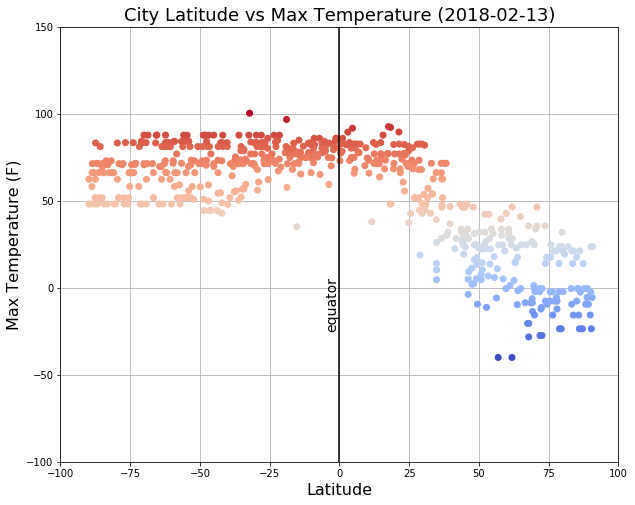

In [61]:
fig,ax = plt.subplots(figsize=(10,8))

scatter = ax.scatter(weather_df['latitude'],weather_df['max_temp'], 
            c=weather_df['max_temp'], cmap=plt.cm.coolwarm, zorder=2)

# fig.colorbar(scatter)

ax.set_title('City Latitude vs Max Temperature ({})'.format(plot_date), fontdict={"fontsize":18})
ax.set_xlabel('Latitude', fontdict={"fontsize":16})
ax.set_ylabel('Max Temperature (F)', fontdict={"fontsize":16})
ax.set_xlim(-100,100)
ax.set_ylim(-100,150)
ax.vlines(0,-100,150)
ax.text(-5,0,'equator', rotation=90, fontdict={"fontsize":14})
ax.grid()

plt.savefig('../images/max_temp.png')
plt.show()

## Latitude vs Humidity Plot

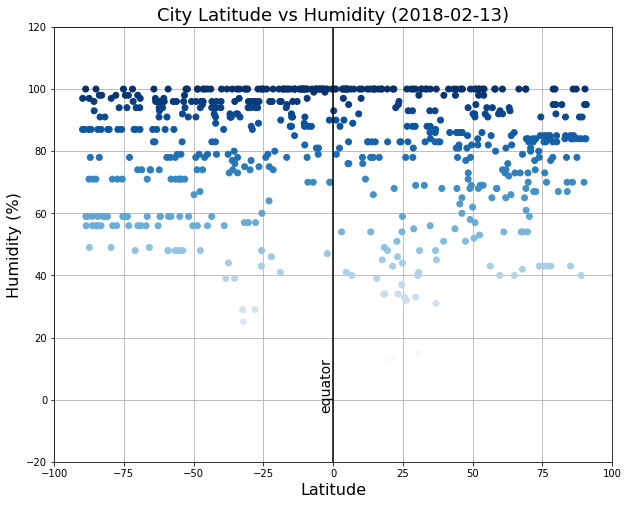

In [58]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(weather_df['latitude'],weather_df['humidity'],
           c=weather_df['humidity'], cmap=plt.cm.Blues, zorder=2)


ax.set_title('City Latitude vs Humidity ({})'.format(plot_date), fontdict={"fontsize":18})
ax.set_xlabel('Latitude', fontdict={"fontsize":16})
ax.set_ylabel('Humidity (%)', fontdict={"fontsize":16})
ax.set_xlim(-100,100)
ax.set_ylim(-20,120)
ax.vlines(0,-20,120)
ax.text(-5, 10,'equator', rotation=90, fontdict={"fontsize":14})

ax.grid()
plt.savefig('../images/humidity.png')
plt.show()

## Latitude vs Cloudiness Plot

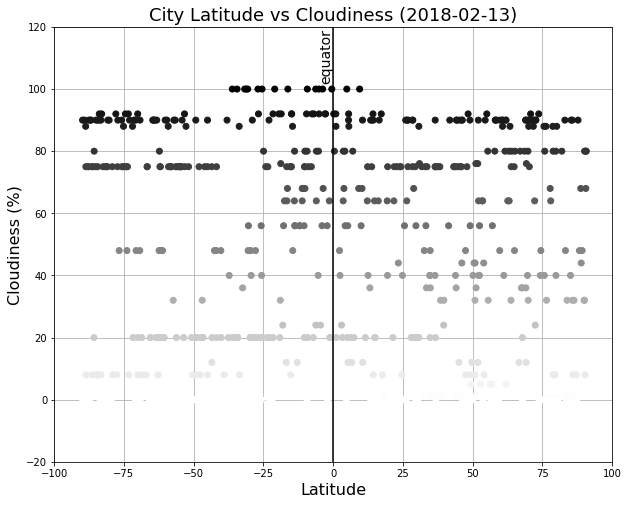

In [59]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(weather_df['latitude'],weather_df['cloudiness'],
           c=weather_df['cloudiness'], cmap=plt.cm.binary, zorder=2)

ax.set_title('City Latitude vs Cloudiness ({})'.format(plot_date), fontdict={"fontsize":18})
ax.set_xlabel('Latitude', fontdict={"fontsize":16})
ax.set_ylabel('Cloudiness (%)', fontdict={"fontsize":16})
ax.set_xlim(-100,100)
ax.set_ylim(-20,120)
ax.vlines(0,-20,120)
ax.text(-5,116,'equator', rotation=90, fontdict={"fontsize":14})

ax.grid()
plt.savefig('../images/cloudiness.png')
plt.show()

## Latitude vs Wind Speed Plot

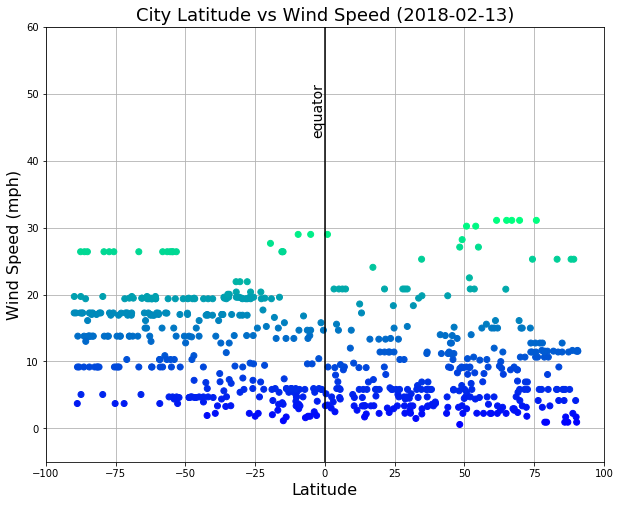

In [60]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(weather_df['latitude'],weather_df['wind_speed'],
           c=weather_df['wind_speed'], cmap=plt.cm.winter, zorder=2) 

ax.set_title('City Latitude vs Wind Speed ({})'.format(plot_date), fontdict={"fontsize":18})
ax.set_xlabel('Latitude', fontdict={"fontsize":16})
ax.set_ylabel('Wind Speed (mph)', fontdict={"fontsize":16})
ax.set_xlim(-100,100)
ax.set_ylim(-5,60)
ax.vlines(0,-5,60)
ax.text(-5,50,'equator', rotation=90, fontdict={"fontsize":14})

ax.grid()
plt.savefig('../images/wind_speed.png')
plt.show()